## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Loading Dataset

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
from google.colab import drive
drive.mount('/content/drive')  

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/sem7pracs/ml/ml mini project/mail_data.csv')
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mail_data.csv')
print(df.head())
print(df.shape)

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
(5572, 2)


## Replace ham with not spam in dataset

In [5]:
df['Category'].replace('ham','not spam',inplace = True)
df.head()

,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


## Check for duplicates and drop if exits

In [6]:
df.duplicated().sum()

415

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(5157, 2)

## check NaN values

In [9]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

## labelling spam mail as 0;  not spam mail as 1;

In [10]:
df.loc[df['Category'] == 'spam', 'Category',] = 0
df.loc[df['Category'] == 'not spam', 'Category',] = 1
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


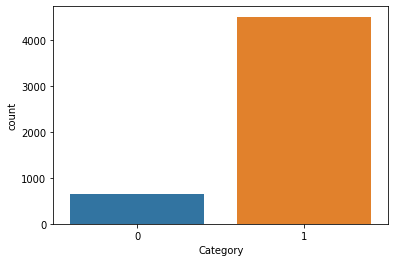

In [11]:
sns.countplot(df['Category'])

## Segregate column data to X and Y variables for test-train split.

In [12]:
X = df['Message']
Y = df['Category']
print(X)
print("\n\n\n")
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object




0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5157, dtype: object


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5157,)
(4125,)
(1032,)


## Transform the text data to feature vectors that can be used as input to the Logistic regression

In [14]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [15]:
print(X_train)

1786                   I dun believe u. I thk u told him.
3576    And do you have any one that can teach me how ...
420     Send a logo 2 ur lover - 2 names joined by a h...
5156    Sir, I need Velusamy sir's date of birth and c...
3354    I emailed yifeng my part oredi.. Can ü get it ...
                              ...                        
809          I am taking half day leave bec i am not well
993     Up to ü... Ü wan come then come lor... But i d...
1726    You know there is. I shall speak to you in  &l...
3525    Yeah that'd pretty much be the best case scenario
1748                     I think u have the wrong number.
Name: Message, Length: 4125, dtype: object


In [16]:
print(X_train_features)

  (0, 6692)	0.48303813512243965
  (0, 6605)	0.4898673616987752
  (0, 1247)	0.5538832733861689
  (0, 2400)	0.4689535663823655
  (1, 1592)	0.5594126567616489
  (1, 5859)	0.5964494866231046
  (1, 6492)	0.5755914257195885
  (2, 300)	0.16113294658934302
  (2, 820)	0.24488128414489752
  (2, 6835)	0.24488128414489752
  (2, 5064)	0.22967525805125708
  (2, 7355)	0.21568440262445418
  (2, 682)	0.22967525805125708
  (2, 25)	0.24488128414489752
  (2, 2564)	0.19505111090227498
  (2, 798)	0.24488128414489752
  (2, 4393)	0.24488128414489752
  (2, 4520)	0.24488128414489752
  (2, 4519)	0.24488128414489752
  (2, 4084)	0.2644704778405301
  (2, 6828)	0.13848562282513652
  (2, 3252)	0.18176623831152225
  (2, 3695)	0.21568440262445418
  (2, 4522)	0.2363176943466334
  (2, 4089)	0.2196593047164816
  :	:
  (4120, 1223)	0.5846719438819551
  (4120, 6456)	0.4751891362657192
  (4120, 3181)	0.4285103741434733
  (4120, 3921)	0.39220487670240334
  (4120, 2101)	0.30807173962343376
  (4121, 5968)	0.4786671802830861
  (

## Training the Logistic Regression Model




In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train_features, Y_train)

LogisticRegression()

## Evaluating the trained model

In [19]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [20]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.961939393939394


## prediction on test data

In [21]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [22]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9544573643410853


## Confusion Matrix

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, prediction_on_test_data))

[[ 92  47]
 [  0 893]]


In [24]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Authentic mail')

else:
  print('Spam mail')

[1]
Authentic mail
